<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN for Regression

PYTORCH BABY!

In [1]:
# Importing the needed libraries 
import numpy as np 
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt

from IPython import display 
display.set_matplotlib_formats('svg')

torch.Size([30, 1]) torch.Size([30, 1])


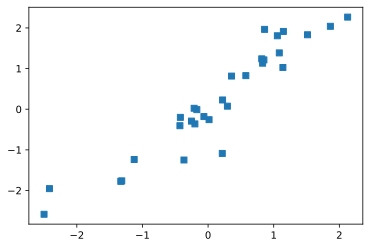

In [2]:
# Create data 
N = 30 
x = torch.randn(N ,1)
y = x + torch.randn(N , 1) / 2 # add some number 

print(x.shape , y.shape)

# Plotting the abe 
plt.plot(x , y,  's')
plt.show()

In [3]:
# Building a simple Pytorch model 
ANNreg = nn.Sequential(
    nn.Linear(in_features= 1 , out_features= 1), # input layer
    nn.ReLU() , # non-linearity - activatio function 
    nn.Linear(1 , 1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
# Defining the meta-parameters for our model 
learning_rate = .05 

# Loss function 
lossfun = nn.MSELoss() 

# Optimizer (the flavour of gradient descent to implement)
# In Pytorch, we have to pass the models parameters into the optimizer along with lr
optimizer = torch.optim.SGD(params = ANNreg.parameters() , lr = learning_rate)


In [5]:
# The training loop 

numepochs = 500 
losses = torch.zeros(numepochs) # variable to store the loss 

# Train the model 
for epoch in range(numepochs): 

  # Forward pass 
  # here we pass the input into the model and store its prediction in yhat
  yHat = ANNreg(x)

  # Compute the loss btw predicted and true values
  loss = lossfun(yHat , y)
  # Storing the loss 
  losses[epoch] = loss 

  # backpropagation 

  # Reinitialize the gradients, set all the derivatives in the model to be zero 
  optimizer.zero_grad()

  # Implement backprop based on the losses calculated  
  loss.backward() 
  optimizer.step()

In [6]:


# Manually computing the losses 
# Final forward pass (predictions)
predictions = ANNreg(x)
predictions

# # Final loss (MSE)
testloss_ = (predictions - y).pow(2).mean()
testloss = lossfun(predictions , y)

testloss_ == testloss



# plt.plot(losses.detach() , 'o' , markerfacecolor = 'w' , linewidth =.1)
# plt.plot(numepochs , testloss.detach() , 'ro')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Final loss = %g' %testloss.item())
# plt.show()

tensor(True)

In [7]:
testloss.item() # just returns the number 

0.19217205047607422

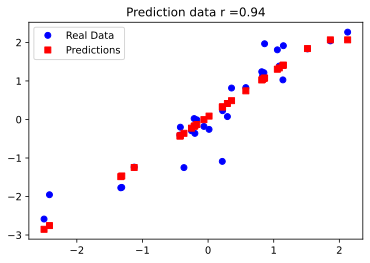

In [8]:
# Plotting the data again 
plt.plot(x , y , 'bo' , label = 'Real Data')
plt.plot(x , predictions.detach() , 'rs', label = 'Predictions')

# Decode the below line later
plt.title(f'Prediction data r ={np.corrcoef(y.T , predictions.detach().T)[0,1]:.2f}') 
plt.legend()
plt.show()

## Code Challenge 

Overview of what will be in here,
- Further explore ANNs for regression 
- Understand the difference between predicting data vs prediction data relationships 

Things to do, 
- Write a python function that builds and train the model and outputs the final prediction and losses. 
- Write a function that creates the data and outputs x and y. 
    - x -> same as previous video
    - y = m*x +randn / 2, where N = 50 

- In a parametric experiment, vary the **slop from -2 to +2 in 21 steps**. Repeat the entire experiment 50 times. 
- Plot the loss and accuracy (correlation of yhat and y) as a function of slope. 

In [9]:
# Fuunction that builds and train the model 

def build_model(x , y):

  model = nn.Sequential(
      nn.Linear(1 , 1), 
      nn.ReLU(), 
      nn.Linear(1 , 1)
  )

  # Defining the meta-paraneters
  learning_rate = .05
  lossfunc = nn.MSELoss()
  optimizer = torch.optim.SGD(params = model.parameters() , 
                              lr = learning_rate)
  
  # Constructing the training loop
  numepochs = 500 
  losses = torch.zeros(numepochs)

  # Train the model 
  for epoch in range(numepochs):

    # Forward prop
    yHat = model(x)

    # Compute the loss 
    loss = lossfunc(yHat , y)
    losses[epoch] = loss

    # Backward prop 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Calculating the total predictions
  predictions = model(x)

  # Final loss 
  testloss = (predictions , y)

  return predictions, losses

In [10]:
# Function to create data 

def make_data(m , N = 50):
  #m = torch.linspace(-2 , 2 , 21)
  x = torch.randn(N , 1)
  y = m * x + torch.randn(N ,1) / 2 

  return x , y 

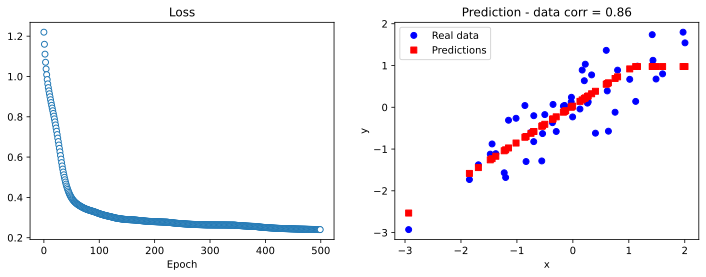

In [11]:
# Running the model and plotting the results 

x , y = make_data(.8)
yHat , losses = build_model(x ,y)

fig , ax = plt.subplots(1 ,2 , figsize = (12 ,4))
ax[0].plot(losses.detach() ,'o' , markerfacecolor = 'w' , linewidth = .1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x , y , 'bo', label = 'Real data')
ax[1].plot(x , yHat.detach().numpy() , 'rs' , label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Prediction - data corr = {np.corrcoef(y.T , yHat.detach().numpy().T)[0 , 1]:.2f}')
ax[1].legend()

plt.show()

With the above results we can understand that most of the times a traditional ML model will outperform a deep learning model. 

In [12]:
# Using the above function and making the data
x_ , y_ = make_data(.8)

x_.shape , y_.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [13]:
# Getting the predictions and losses
preds , ls = build_model(x_ , y_)

In [14]:
# # Parametric experiments 

# numExp = 5


# for exp in range(numExp):

#  # experiments = np.zeros((numExp , 2)) did mistakke here 
#   m_ = torch.linspace(-2 , 2 , 21)
#   results = np.zeros((len(m_) , numExp , 2))

  
#   m = np.random.choice(m_, size = 1)
#   m = torch.Tensor(m)
  
#   # Make data for every iteration with different slope
#   x , y = make_data(m) 

#   # Train the model 
#   predictions , losses = build_model(x , y)

#   # Storing the predictions and loss for every iteration 
#   experiments[exp , :] = predictions , losses
# #   print('\n $$$$$$$$$$$$ \n')
# #   print(f'Predictiosn --> {predictions}')
# #   print('\n--\n')
# #   print(f'Loss --> {losses.shape}')


# # #experiments[:5]



# experiments

In [15]:
from tqdm import tqdm
# The slopes to simulate 
slopes = np.linspace(-2 , 2 ,21)

numExps = 50 

# Initialize output matrix 
results = np.zeros((len(slopes) , numExps , 2))

for slope in tqdm(range(len(slopes))):

  for N in range(numExps):

    # Create the dataset and run the model 
    x , y = make_data(slopes[slope])
    yHat , losses = build_model(x , y)

    # Store the final loss and performance 
    results[slope , N , 0] = losses[-1]  # Only the final loss 

    # 2nd element in matrix is correlation btw y and yHat 
    results[slope , N ,1] = np.corrcoef(y.T , yHat.detach().T)[0,1] 

#Coorelation can be 0 if the model didn't do well, set Nan's ->0
results[np.isnan(results)] = 0

  0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 21/21 [03:03<00:00,  8.73s/it]


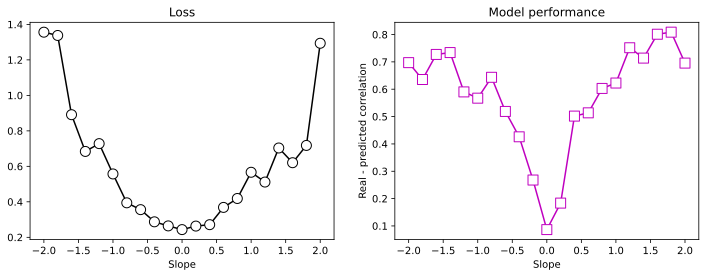

In [16]:
# Plot the above results 

fig , ax = plt.subplots(1 ,2 ,figsize = (12, 4))

# Taking average over 50 experiments
ax[0].plot(slopes , np.mean(results[: , : , 0] , axis = 1) , 'ko-' , markerfacecolor = 'w' , markersize = 10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes , np.mean(results[: , : , 1], axis = 1) , 'ms-' , markerfacecolor = 'w', markersize = 10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real - predicted correlation')
ax[1].set_title('Model performance')

plt.show()

## ANN for classifying qwerties 
- How to construct an ANN model for binary classification. 
- Why its dangerous to assume that ANNs always work. 

In [17]:
# importing the libraries again 
import torch 
import torch.nn as nn 
import numpy as np 

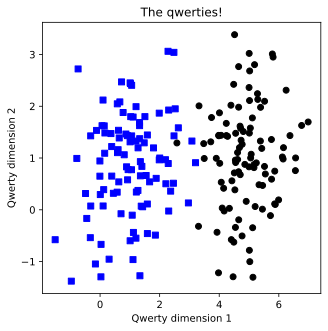

In [18]:
# Create data 

nPerClust = 100 # per category / cluster 
blur = 1 # Standard dev -> explains how to spread out the data 

# Coordinates for the data to be centered
A =[1 ,1]
B = [5 ,1]

# Generate data 
a = [ A[0] + np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]

# True labels for the data 
# vstack -> stack virtually 
labels_np = np.vstack((np.zeros((nPerClust ,1)) , np.ones((nPerClust , 1))))

# Concatentate the data into a matrix
data_np = np.hstack((a ,b)).T

# Convert the above to a pytorch tensor 
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data 
fig = plt.figure(figsize = (5 ,5))
plt.plot(data[np.where(labels == 0)[0] , 0] , data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0] , 0] , data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('Qwerty dimension 1')
plt.ylabel('Qwerty dimension 2')
plt.show()




In [19]:
# Building the model
in_feat = data.shape[1]

ANNclassify = nn.Sequential(
    nn.Linear(in_feat , 1) , # Input layer 
    nn.ReLU(), # Activation unit 
    nn.Linear(1 , 1), # output unit, linear weighted sum
    nn.Sigmoid() # output activation unit 
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [20]:
# Other model features / metaparameters

learning_rate = .01 

# Loss function 
loss_func = nn.BCELoss() # best is BCEWithLogits


# Optimizer 
optimizer = torch.optim.SGD(params = ANNclassify.parameters() , lr = learning_rate)


In [21]:
# Train the model 
numepochs = 1000 
losses = np.zeros(numepochs)

for epoch in range(numepochs):

  # forward prop 
  yHat = ANNclassify(data)

  # Compute the loss 
  loss = loss_func(yHat , labels)
  losses[epoch] = loss 

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


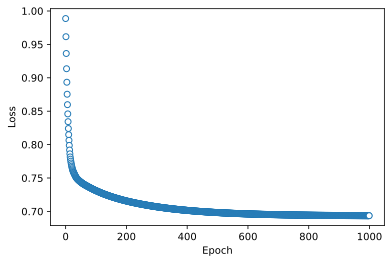

In [22]:
# Show the losses 
plt.plot(losses , 'o' , markerfacecolor  = 'w' , linewidth = .1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [23]:
# Compute the predictions 


# Firstly will manually compute the losses 
# Forward pass -> predictions 
predictions = ANNclassify(data)

# Into prediction probabilities 
pred_labels = predictions > .5

# Find the errors 
misclassified = np.where(pred_labels != labels)[0]

# Total accuracy 
total_acc = 100 - 100*len(misclassified) / (2*nPerClust)
total_acc

50.0

## Learning rates comparison 
- How to put the model-creation and model-training code into callable functions. 
- How to run parametric experiments with ANN models. 
- The effects of learning rate on performance. 
- The puzzling results provide a great learning opportunity. 

In [24]:
# Creating the model 

def createANNmodel(learningRate):

  ANNclassify = nn.Sequential(
      nn.Linear(2, 1) , 
      nn.ReLU() ,
      nn.Linear(1, 1)
      # No sigmoid
  )

  # Loss function 
  lossfunction = nn.BCEWithLogitsLoss()

  # Optimizer 
  optimizer = torch.optim.SGD(ANNclassify.parameters() , lr = learningRate)

  return ANNclassify , lossfunction , optimizer


In [25]:
# Function to train the model 

numepochs = 1000 

def trainTheModel(ANNModel):

  # Intialize the losses 
  losses = torch.zeros(numepochs)

  # Loop over epochs 
  for epoch in range(numepochs):

    # Forward pass 
    yHat = ANNModel(data)

    # Compute loss 
    loss = lossfunction(yHat , labels)
    losses[epoch] = loss 

    # backward prop 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Making the final predictio 
  predictions = ANNModel(data)

  # Compute the predictions and accuracy
  # We use 0 here because of the loss function BCEwithlogit loss and it has sigmoid inhereted
  # since the model output will be from a linear layer we will use 0
  totalacc = 100*torch.mean(((predictions>0) == labels).float())

  return losses , predictions , totalacc


Final accuracy 50.0


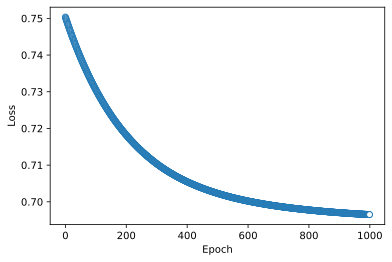

In [26]:
ANNclassify , lossfunction, optimizer = createANNmodel(.01)

# Running the model 
losses , predictions , totalacc = trainTheModel(ANNclassify)

# Report accuracy 
print(f'Final accuracy {totalacc}')

# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

### Learning rate experiments 

In [27]:
# Set of learning rates to test 
learningrates = np.linspace(.001 , .1 , 40)

# Initialize the result output (storing)
accByLR = [] # storing the accuracy wrt learning rates
allLosses = np.zeros((len(learningrates) , numepochs))

# Loop through learning rates 
for i , lr in enumerate(learningrates):

  # Create and run the model
  ANNclassify, lossfun, optimizer = createANNmodel(lr)
  losses , predictions , totalacc = trainTheModel(ANNclassify)

  # Store the results in each result vector 
  accByLR.append(totalacc)
  allLosses[i , :] = losses.detach()

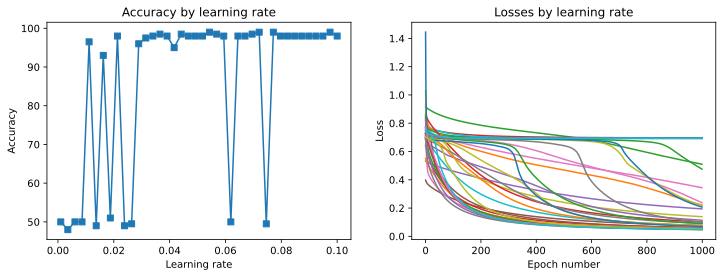

In [28]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [29]:
# How many times does the model got greater than 70%? 
# Proportion of runs where the model had at least 70% accuracy 

sum(torch.tensor(accByLR)> 70 / len(accByLR))

tensor(40)

**Drawing conclusions from our experiments**

- We can see sometimes our model got lucky with a good initial weight randomization and it proceeds to do better. 
- This means that chance played a large role in our conclusions. 

`New experiment:` Repeat the previous experiment 50 times and average the results.  But why are we doing? 

Because there is alot of variability in our model learning and the amount of variability really affects the relationship between the learning rate and accuracy. 

#### Running a meta experiment to get more reliable results 

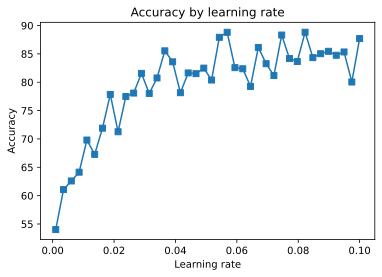

In [30]:
# Run the meta-experiment by repeating the same experiment 50 times 
# This time different random weight initialization each time 

# Number of times to iterate through the expeirment 
numExps = 50 

# Result Matrix to store all the results 
accMeta = np.zeros((numExps , len(learningrates)))

# Fewer epochs to reduce the computation time 
numepochs = 500 

# Now for the experiment 
for exp in range(numExps):
  for i , lr in enumerate(learningrates):

    # Create and run the model 
    ANNclassify , lossfun , optimizer = createANNmodel(lr)
    losses, predictions , totalacc = trainTheModel(ANNclassify)

    # Store the results 
    accMeta[exp , i] = totalacc

# Taking the average over all experiments and plotting the results 
plt.plot(learningrates , np.mean(accMeta , axis = 0) , 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

## Multilayer ANN's 

Adding more layers. 

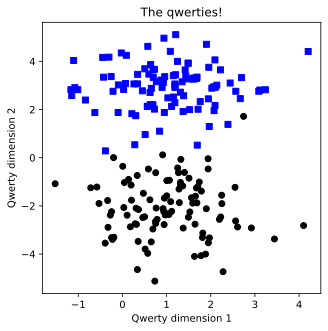

In [31]:
# Re-defining the data 

nPerClust = 100 
blur = 1 

# Changing the centeriods 
A = [1 ,3]
B = [1, -2]

# Generate data 
a = [ A[0] + np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]

# True labels for the data 
# vstack -> stack virtually 
labels_np = np.vstack((np.zeros((nPerClust ,1)) , np.ones((nPerClust , 1))))

# Concatentate the data into a matrix
data_np = np.hstack((a ,b)).T

# Convert the above to a pytorch tensor 
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data 
fig = plt.figure(figsize = (5 ,5))
plt.plot(data[np.where(labels == 0)[0] , 0] , data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0] , 0] , data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('Qwerty dimension 1')
plt.ylabel('Qwerty dimension 2')
plt.show()

In [32]:
data.shape , labels.shape

(torch.Size([200, 2]), torch.Size([200, 1]))


After changing the origins now the above data is horizantally separable. 


In [33]:
def createANNmodel(learningRate):

  # Model architecture 
  ANNclassify = nn.Sequential(
      nn.Linear(2 , 16) , 
      nn.ReLU(), 
      nn.Linear(16 , 1) , # in_features == out_features of prev layer
      nn.ReLU(), 
      nn.Linear(1 , 1), 

      # if bcelogits used uncomment the below activation function
      nn.Sigmoid() 
  )

  # Loss function 
  loss_function = nn.BCELoss()

  # Optimizer 
  optimizer = torch.optim.SGD(params = ANNclassify.parameters() , lr = learningRate)

  return ANNclassify , loss_function , optimizer

dummy_model, _, e = createANNmodel(.001)
dummy_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [34]:
# Function to train the model

numepochs = 500 

def trainTheModel(ANNModel):

  # Initialize the resultant losses 
  losses = np.zeros(numepochs)

  # Constructing the training loop 
  for epoch in range(numepochs):

    # Forward pass 
    yHat = ANNModel(data)

    # Compute loss and store it 
    loss = loss_function(yHat , labels)
    losses[epoch] = loss

    # Backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  
  # Getting the prediction after training the model 
  predictions = ANNModel(data)

  # If sigmoid is used let it be .5
  # If no sigmoid func used then it should be 0
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())

  return losses , predictions , totalacc


In [35]:
y_ = dummy_model(data)

y_.shape , y.shape

(torch.Size([200, 1]), torch.Size([50, 1]))

Final accuracy: 98.5%


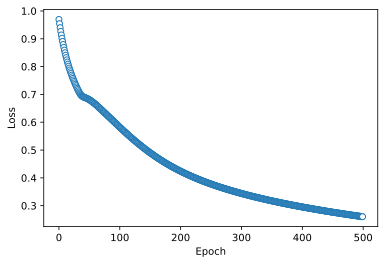

In [36]:
# create everything
ANNclassify,loss_function,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

## Linear solutions to linear problems 

In [37]:
# Creating a linear model 

def createLinearModel(learningRate):

  ANNclassify = nn.Sequential(
      nn.Linear(2 , 16), 
      nn.Linear(16 , 1), 
      nn.Linear(1 , 1) , 
      nn.Sigmoid() ,
  )

  # Loss function 
  loss_function = nn.BCELoss() 

  # Optimizer 
  optimizer = torch.optim.SGD(ANNclassify.parameters() , lr = learningRate)

  return ANNclassify , loss_function , optimizer

Final accuracy: 99%


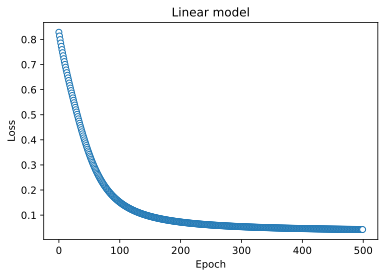

In [38]:
# create everything
ANNclassify,loss_function,optimizer = createLinearModel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.title('Linear model')
plt.show()

In [39]:
# Set of learning rates to test 
learningrates = np.linspace(.001 , .1 , 40)

# Initialize the result output (storing)
accByLR = [] # storing the accuracy wrt learning rates
allLosses = np.zeros((len(learningrates) , numepochs))

# Loop through learning rates 
for i , lr in enumerate(learningrates):

  # Create and run the model
  ANNclassify, lossfun, optimizer = createLinearModel(lr)
  losses , predictions , totalacc = trainTheModel(ANNclassify)

  # Store the results in each result vector 
  accByLR.append(totalacc)
  allLosses[i , :] = losses

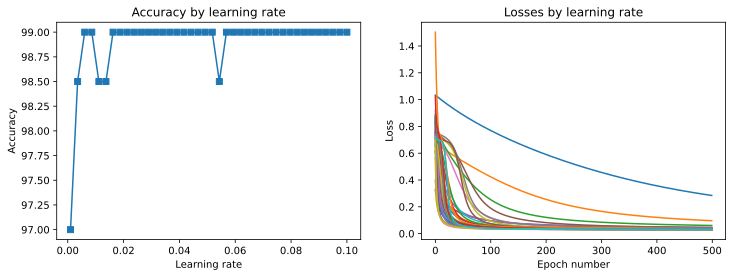

In [40]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

We can see all the models are above 98%! But why the non-linear model wasn't able to work well in this same data?

## Multi- output ANN

In [41]:
 # Import and process the data 
 import seaborn as sns 
 iris = sns.load_dataset('iris')

 # Check out the first few liens of the data
 iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


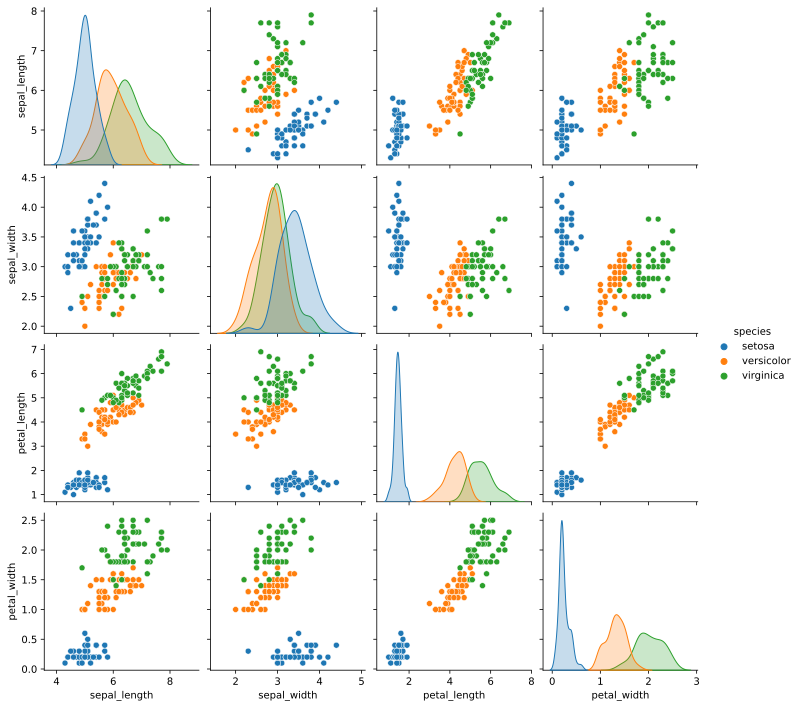

In [42]:
# Plotting the data 
sns.pairplot(iris , hue = 'species')
plt.show()

In [43]:
# Organize and prepare the data

# Convert from pandas df to tensor 
iris_data = torch.tensor(iris [iris.columns[0:4]].values).float()

# Transform species to number 
labels = torch.zeros(len(iris_data) , dtype = torch.long)

# Except setosa -> its zero when we converted above
labels[iris.species == 'versicolor'] = 1 
labels[iris.species == 'virginica'] = 2 

labels[:30] # data isn't randomized 


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [44]:
# Creating the model (fully connected)

ANNiris = nn.Sequential(
    nn.Linear(4 , 64), # Input layer (4 features)
    nn.ReLU() , 
    nn.Linear(64 , 64),  # hidden layer
    nn.ReLU(), 
    nn.Linear(64 , 3) #  out_features -> 3 categories
)

# Loss function 
 # it has log softmax and nlloss embedded within, so we don't have to use softmax in the final layer
lossfun = nn.CrossEntropyLoss()

# Optimizer 
optimizer = torch.optim.SGD(ANNiris.parameters() , lr = .01)

ANNiris

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

In the training loop we will be computing the accuracy for each epoch / training step unlike the previous time we computed the overall accuracy at the end of training loop. 

This is to observe how the accuracy changes as the data fits to function. 

In [45]:
# Training loop 

numEpochs = 1000 
losses = torch.zeros(numEpochs)
trackAccuracy = []

for epoch in range(numEpochs):

  # forward pass 
  yHat = ANNiris(iris_data)

  # Compute the loss and store it 
  loss = lossfun(yHat , labels)
  losses[epoch] = loss 

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Computing the accuracy for each epoch 
  matches = torch.argmax(yHat , axis =1) == labels # booleans (t /f) / max value in each row 
  matchesNumeric = matches.float()                 # convert them into numbers
  accuracyPct = 100*torch.mean(matchesNumeric)     #  getting the accuracy pct for one epoch
  
  # Appending the accuracy to a list 
  trackAccuracy.append(accuracyPct)

# Final forward pass making the prediction after training 
predictions = ANNiris(iris_data)

# Getting the prediction label 
predLabels = torch.argmax(predictions , axis = 1)

# Calculating the total accuracy 
totalAcc = 100*torch.mean((predLabels == labels).float())

In [46]:
totalAcc

tensor(98.)

Final accuracy: 98%


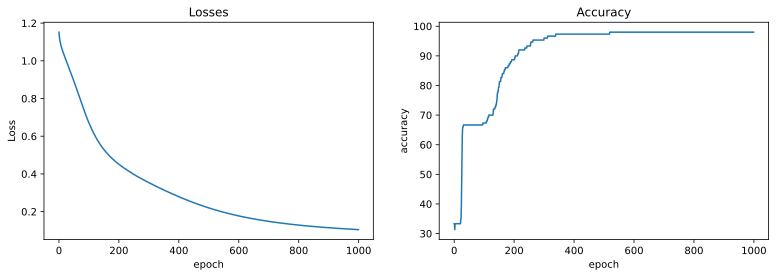

In [47]:
# Visualizing the results 

# report accuracy
print('Final accuracy: %g%%' %totalAcc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trackAccuracy)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [48]:
# Confirm that all model predictions sum to 1, but only when converted to softmax 
sm = nn.Softmax(1)
#print(yHat)
torch.sum(sm(yHat) , axis = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

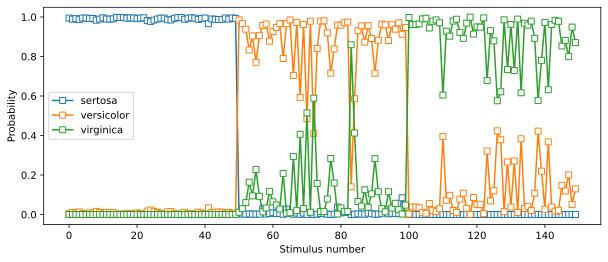

In [49]:
# Plot the raw model outputs with softmax

fig = plt.figure(figsize = (10 , 4))

plt.plot(sm(yHat.detach()) , 's-' , markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['sertosa' , 'versicolor' , 'virginica'])
plt.show()

## Code Challenge -> Many Qwerties 

- Gain more experience working with ANNs for multiple outputs 

Things to do, 
- Integrate Qwerty and Multi output notebook. 
- Make three groups of qwerties and train a 3-output ANN to classify them. 




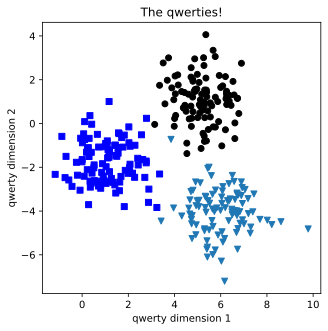

In [99]:
# Creating the data 

nPerClust = 100 
blur = 1 

A = [1 ,-2]
B = [5, 1]
C = [6 , -4]

# Generate the data 
a = [A[0] + np.random.randn(nPerClust)*blur , A[1] + np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# Generating true labels 
#labels_mul = np.vstack((np.zeros((nPerClust , 1)) , np.ones((nPerClust , 1)) , np.ones((nPerClust , 1)) + 1))
labels_new = torch.zeros(len(data_new) , dtype = torch.long)
labels_new[100:200] = 1 
labels_new[200:300] = 2

labels_new = labels_new.squeeze()

# For the 1 and 2 category 


# Concatenate the data into matrix 
data_mul = np.hstack((a , b ,c)).T

# Conver the above into a pytorch tensor 
data_new = torch.tensor(data_mul).float()
#labels_new = torch.tensor(labels_mul).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data_new[np.where(labels_new==0)[0],0],data_new[np.where(labels_new==0)[0],1],'bs')
plt.plot(data_new[np.where(labels_new==1)[0],0],data_new[np.where(labels_new==1)[0],1],'ko')
plt.plot(data_new[np.where(labels_new==2)[0],0],data_new[np.where(labels_new==2)[0],1],'v')
#plt.plot(data_new[np.where(labels_new == 2)[0],0] , data_new[np.where(labels _new== 2)[0] , 1], 'bs')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [123]:
h = m(data_new)
h.shape

torch.Size([300, 3])

In [127]:
# Building a multi output model 

def createMultiModle(learningRate):

  model = nn.Sequential(
      nn.Linear(2 , 16) , 
      nn.ReLU(), 
      nn.Linear(16 , 32), 
      nn.ReLU(), 
      nn.Linear(32 , 3), 
      nn.Softmax(1)
  )

  loss_func = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters() , lr = learningRate)

  return model , loss_func , optimizer

In [128]:
# hat = model(data_new)
# hat.shape , labels_new.shape

In [135]:
# Constructing the training loop  
model , loss_func , optimizer = createMultiModle(.01)



numEpochs = 10000

# Initialize the resultant loss 
losses = torch.zeros(numEpochs)
trackAcc = []

# Training loop 
for epoch in range(numEpochs):

  # Forward pass 
  yHat = model(data_new)

  # Compute the loss and store it 
  loss = loss_func(yHat , labels_new)
  losses[epoch]  = loss

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Computing accuracy for each epoch 
  matches = torch.argmax(yHat , axis = 1) == labels_new
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  trackAcc.append(accuracyPct)

# Computing the predictions after the training 
predictions  = model(data_new)
pred_labels = torch.argmax(predictions , axis = 1)
totalAcc = 100*torch.mean((pred_labels == labels_new).float())

print(f' Models accuracy is {totalAcc.item()}')

 Models accuracy is 99.33333587646484


In [136]:
# It should sum to 1 
yHat[5].sum()

tensor(1., grad_fn=<SumBackward0>)

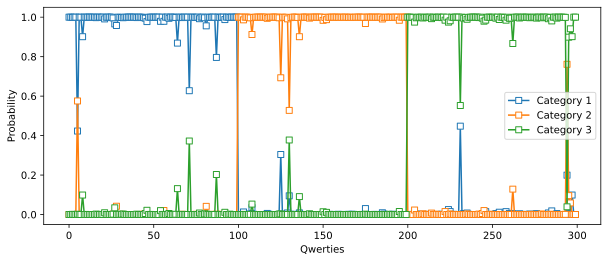

In [137]:


# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Qwerties')
plt.ylabel('Probability')
plt.legend(['Category 1','Category 2','Category 3'])
plt.show()


Final accuracy: 99%


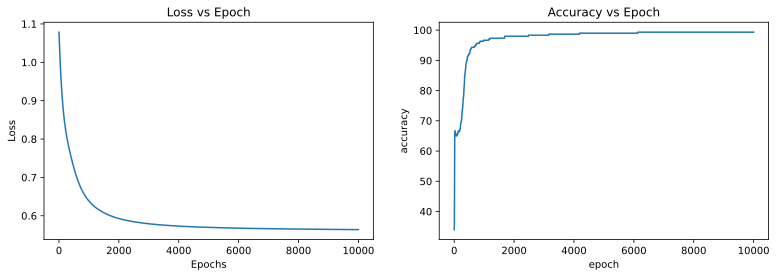

In [138]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Loss vs Epoch')

ax[1].plot(trackAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy vs Epoch')
plt.show()
# run training again to see whether this performance is consistent